In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_blobs
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#data loading
data = pd.read_csv('ionosphere_data.csv',header=None)

x=data.values[:,:-1]
x=x.astype(float)

y=data.values[:,-1]
y[np.where(y=='g')]=1
y[np.where(y=='b')]=0
y=np.array([y]).T
y=y.astype(float)

#split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=2)

In [7]:
print(x_train.shape) 
print(x_test.shape)

(280, 34)
(71, 34)


In [3]:
def cross_entropy(predictions, targets,epsilon=1e-12):
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    N = predictions.shape[0]
    ce = -np.sum(np.sum(targets * np.log(predictions + 1e-9))) / N
    return ce

def RMSE(predictions, targets):
    return np.sqrt(((predictions - targets)**2).mean())
def mini_batch(x, y, batch_size):
    for i in np.arange(0, x.shape[0], batch_size):
        yield (x[i:i + batch_size], y[i:i + batch_size])
def out(x):
    for i in range(len(x)):
        if x[i]<0.5:
            x[i]=0
        elif x[i]>0.5:
            x[i]=1
    return x
def accuracy(x,y):
    count=0
    for i in range(len(x)):
        if x[i]==y[i]:
            count+=1
    acc=count/len(x)
    return acc

In [4]:
class NeuralNetwork():
    def __init__(self):
        np.random.seed(1)
        self.w1 = 2*np.random.random((34,10))-1
        self.w2 = 2*np.random.random((10,1))-1
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    def sigmoid_p(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))
    def tanh(self, x):
        return np.tanh(x)
    def dtanh(self, x):
        return 1. - self.tanh(x) * self.tanh(x)
    def forward(self, input):
        self.z1 = np.dot(input, self.w1)
        self.l1 = self.sigmoid(self.z1)  
        self.z2 = np.dot(self.l1, self.w2) 
        output = self.z2
        return output

    def backpropagation(self, input, lable, output):
        self.output_deltas = lable - output
        self.grad_w2 = np.dot(self.l1.T, self.output_deltas)
        self.grad_l1 = self.output_deltas.dot(self.w2.T)
        self.l1_delta = self.grad_l1 * self.sigmoid_p(self.z1)
        self.grad_w1 = np.dot(input.T, self.l1_delta)
        self.w2 = self.w2+learning_rate * self.grad_w2-0.002*self.w2
        self.w1 = self.w1+learning_rate * self.grad_w1-0.002*self.w1

    def train(self, x_train, y_train, batch_size):
        for (b_x, b_y) in mini_batch(x_train, y_train, batch_size):
            output = self.forward(b_x)
            self.b_y=b_y
            self.backpropagation(b_x, b_y, output)

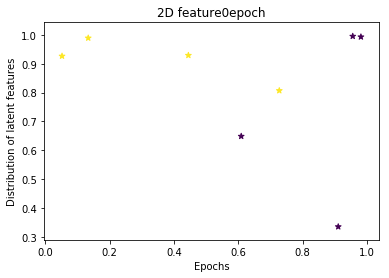

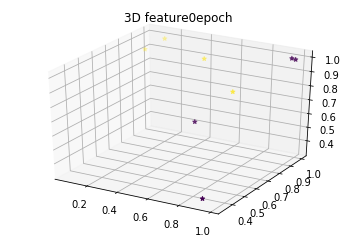

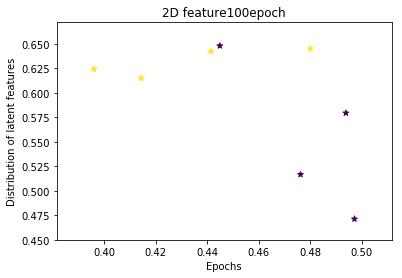

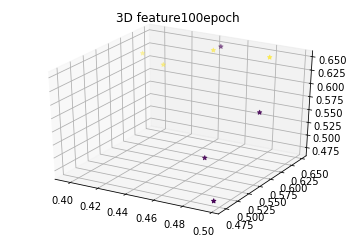

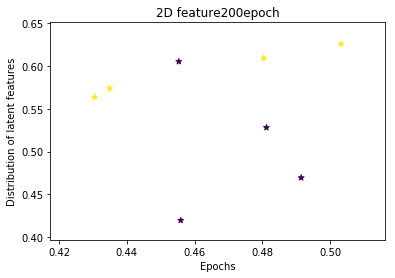

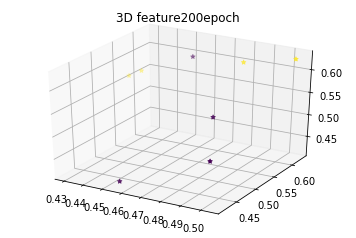

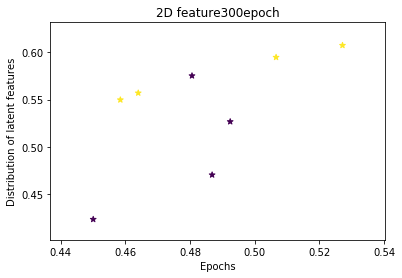

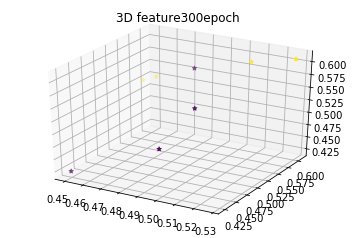

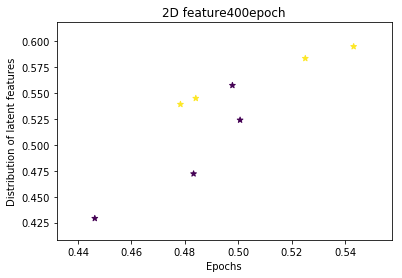

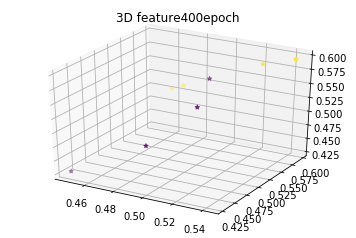

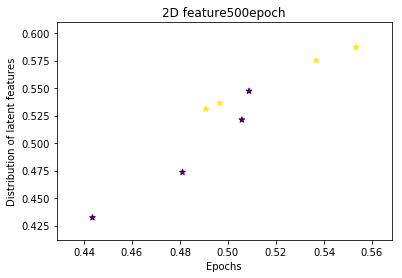

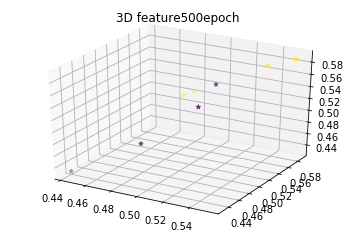

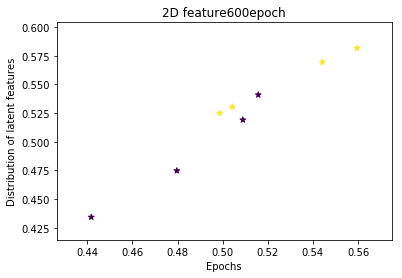

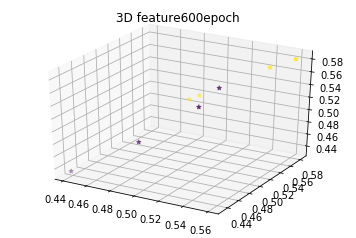

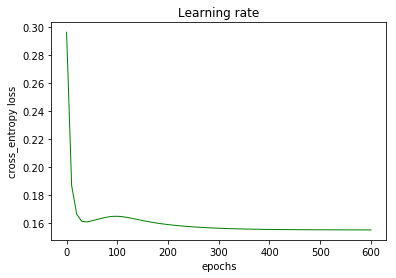

In [31]:
#parameters
eporchs =600
learning_rate = 0.03
batch_size=16


#train model
nn = NeuralNetwork()
a = []
b = []
for i in range(eporchs + 1):
    nn.train(x_train, y_train,batch_size)
    if i %100  == 0:
        p1 =plt.scatter(nn.l1[:,0], nn.l1[:,1], c=nn.b_y.reshape(-1), marker = '*')
        plt.xlabel("Epochs")
        plt.ylabel("Distribution of latent features")
        plt.title("2D feature"+str(i)+"epoch")
        #plt.legend(('class1', 'class2'), scatterpoints=2, loc='best')
        plt.savefig("2d"+str(i)+".jpeg")
        plt.show()
      
        
        fig= plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(nn.l1[:,0], nn.l1[:,1], nn.l1[:,1], c=nn.b_y.reshape(-1), marker = '*')
        plt.title("3D feature"+str(i)+"epoch")
        plt.savefig("3d"+str(i)+".jpeg")
        plt.show()
        
    tr_pred = nn.forward(x_train)
    
   
    loss= cross_entropy(tr_pred, y_train,epsilon=1e-12)
    
    if i % 10 == 0:
        a.append(i)
        b.append(loss)
        
plt.figure()
plt.plot(a, b, 'g', linewidth=1.0)
plt.xlabel("epochs")
plt.ylabel("cross_entropy loss")
plt.title("Learning rate")
plt.savefig("Learning_curve2.jpeg")
plt.show()




In [28]:
tr_pred = nn.forward(x_train)
mse_train = cross_entropy(tr_pred, y_train,epsilon=1e-12)
print("Cost Function for Train :",mse_train)

tr_pred = nn.forward(x_test)
mse_test = cross_entropy(tr_pred,y_test,epsilon=1e-12)
print("Cost Function  for test:",mse_test)

tr_pred = nn.forward(x_train)
pred=out(tr_pred)
print("accuracy_train:",accuracy(pred,y_train))

te_pred = nn.forward(x_test)
pred1=out(te_pred)
print("accuracy_test:",accuracy(pred1,y_test))

Cost Function for Train : 0.15547446024988515
Cost Function  for test: 0.10936273315758809
accuracy_train: 0.9428571428571428
accuracy_test: 0.8169014084507042
